# Cours 3: Fonction et récursion

**Objectif :** Le but de ce cours est de vous présenter le système de fonction, et les subtilités qui vont avec. Nous aborderons aussi les dictionnaires.

## 1. Définir une fonction
Les fonctions servent à éviter le copier coller de code. Typiquement, dans les TDs précédents, nous avons utilisé à moulte reprises une ligne de code servant à demander un entier à l'utilisateur, et le traiter comme un entier et non une chaine de caractères. Pour éviter de réécrire cette ligne plusieurs fois, nous aurions pu créer une fonction ```ask_int``` comme suit:

In [1]:
def ask_int(description):
    result = input(description)
    return int(result)

Ainsi, nous aurions pu écrire ```n = ask_int('Entrer un entier: )``` au lieu de ```n = int(input('Entrer un entier'))```. Du point de vue de l'ordinateur, cela ne change rien. Pour ce cas précis, cela ne change que très peu de chose pour le codeur.

Cependant, si nous voulons tester dans le même temps si l'utilisateur à bien entrer un entier, nous pouvons le faire dans la définition de la fonction, et cela n'aura aucun effet sur la lisibilité du code lors de l'appel de cette fonction.

In [2]:
def ask_int(description):
    result = input(description)
    while not result.isnumeric():
        print("Ceci n'est pas un entier")
        result = input(description)
    return int(result)

Décrivons exactement les lignes de codes que nous avons écrites:
* Le mot clef `def` indique le début de la définition de la fonction. Il est suivi du nom de la fonction (`ask_int`) et des arguments qu'elle recoit. Cette première ligne ce finit par `:`, et suivantes auront donc une indentation.
* Les lignes suivantes sont les opérations effectuées chaque fois que cette fonction est appelée. Les variables définit dans cette partie ne seront pas accessible en dehors de la définition de la fonction.
* Enfin, le mot clef `return` indique le résultat de la fonction, ce qu'elle renvoie. `return` interrompt l'execution de la fonction, les lignes écrites après ne seront pas éxécutées.
    
Pour illustrer ce que nous avons vu, voici un exemple:

In [3]:
result = 5

def foo(x):
    result = x**2
    return result
    print('Ceci ne sera pas affiché!')

x = foo(5)
print(f'x vaut {x}, result vaut {result}')

x vaut 25, result vaut 5


Il convient de préciser qu'une fonction, une fois définie, n'exécute pas le code qu'elle possède à l'intérieur de sa définition ! Un exemple pour illustrer ceci :

In [4]:
def foo(x):
    bonjour + "à tous" / 12 - ["a", 13]
    result = x**2
    return result

print("Aucune erreur pour l'instant, mais cela ne va pas tarder")
foo(3)

Aucune erreur pour l'instant, mais cela ne va pas tarder


NameError: name 'bonjour' is not defined

Il s'agit d'une définition théorique de la fonction, qui fonctionnera tant qu'elle ne contiendra pas d'erreur de syntaxe. C'est uniquement lorsque vous appelez cette fonction avec des paramètres en entrée que le code qui la compose sera exécuté.

## 2. Les arguments et les keywords arguments

Une fonction peut n'avoir aucun argument:

```python
def foo():
    # les instructions
    # return si besoin
```

On peut passer un ou plusieurs arguments à une fonction en les séparant par une virgule:

```python
def foo(arg1, arg2, arg3):
    # les instructions
    result = ...
    return result
```

De plus, on peut donner aux variables des valeurs par défaut comme ceci:

```python
def bar(arg1, arg2=val2, arg3=val3):
    result = ...
    return result
```

Ici, si `bar` est appelé avec un seul argument, elle sera exécutée avec `val2` comme valeur pour `arg2` et `val3` comme valeur pour `arg3`. Si `bar` est appelé avec deux arguments, alors `arg3` prendra sa valeur par défaut. Il est néanmoins possible de donner une valeur à `arg3` sans en donner à `arg2` en écrivant `arg3=...` lors de l'appel de la fonction.

Petit récapitulatif des différentes possibilités pour appeler la fonction `bar`:

```python
bar(x1, x2, x3) = bar(arg1=x1, arg2=x2, arg3=x3)
bar(x1) = bar(x1, val2, val3)
bar(x1, x2) = bar(x1, arg2=x2) = bar(x1, x2, val3)
bar(x1, arg3=x3) = bar(x1, val2, x3)
```

**Attention**: l'ordre des arguments est très importants, puisque c'est lui qui désigne à quelle variable vous attribuez une valeur.

Les arguments ayant une valeur par défaut sont appelés keywords arguments, ou kwargs. Il n'est pas possible de mettre un argument après un keyword argument.

## 3. Module et package

Les fonctions que vous définissez ne sont pas forcément à mettre dans le même fichier/notebook que celui que vous travaillez. Vous pouvez les mettre dans un fichier séparé et les importer. Par exemple, si au même niveau d'arborescence que ce notebook, vous créez un fichier `file1.py` et que dans ce fichier, vous créez une fonction `foo`, vous pourrez y accéder grâce au mot clef `import`:

```python
from file1 import foo

foo(args)
```

ou bien

```python
import file1

file1.foo(args)
```

Les imports sont généralement mis en début de fichier. Pour les notebooks, cela dépend des personnes. En tout cas, il est préférable de les mettre en haut de cellule.

Dans python, il existe de nombreux packages. Ceux-ci fournissent de précieuses fonctions. Ils s'importent de la même facon que vos modules. De plus, il peut y avoir plusieurs niveaux de hiérarchie dans ce package. Prenons comme exemple la bibliothèque matplotlib. Matplotlib est une bibliothèque permettant de faire des graphiques simplement. On travaille avec le package pyplot contenu dans cette bibliothèque (que l'on renomme plt pour faire cours grâce au mot clef `as`)

In [5]:
import matplotlib.pyplot as plt
# Ou alors
from matplotlib import pyplot as plt

Maintenant, pyplot est aussi un package, contenant lui même des fonctions. Par exemple, pour faire un tracé simple, on peut utiliser la fonction `plot` de pyplot.

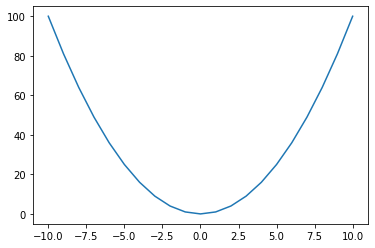

In [6]:
plt.plot([i for i in range(-10, 11)], [i*i for i in range(-10, 11)])

Nous aurion aussi pu charger uniquement la fonction plot. Pour ce faire, il faut séparer les packages imbriqués par des points `.`.

```python
from matplotlib.pyplot import plot
```

Si on a besoin de plusieurs fonctions de pyplot, on peut les importer en une seule ligne en les séparant par des virgules `,`.

Nous venons de voir une fonction dans un package dans un package. Néanmoins, il est possible que l'arborescence soit bien plus complexe, et d'avoir trois ou quatres packages imbriqués. Cela sert à garder son code le plus compréhensible possible.

Pour faire de même, il vous suffit de créer des dossiers, puis des fichiers contenant des fonctions dans ces dossiers. Si vous avez un dossier `mon_package` contenant les fichers `mon_module1.py` et `mon_module2.py`, eux-mêmes contenant des fonctions, vous pourrez les appeler de la même facon que pyplot.

**Attention aux conflits de nom:** si vous avez dans ces deux fichiers une fonction foo, vous ne pourrez charger les deux comme suit:

```python
from mon_package.mon_module1 import foo
from mon_package.mon_module2 import foo
```

La première ne sera pas chargée. Cependant, ceci est possible:

```python
from mon_package import mon_module1, mon_module2

mon_module1.foo(args)
mon_module2.foo(args)
```

# 4. Les dictionnaires

Nous avons vu dans le cours précédent les listes. Celles-ci sont très utiles, mais elles peuvent se révéler insuffisantes.

Prenons un exemple. Nous voulons garder en mémoire le nom des élèves ainsi que leur email. En utilisant des listes, il faut une liste pour les noms et une liste pour les emails:

```python
names = ['Benoit', 'Jean', 'Pierre']
emails = ['email.benoit@gmail.com', 'email.jean@gmail.com', 'email.pierre@gmail.com']
```

Ceci fonctionne, mais n'est pas pratique. Si nous voulons l'email de Pierre, nous devons trouver l'index associé dans la liste des noms, puis l'email dans la liste des emails.

Pour gérer les cas comme celui-ci, nous avons à notre disposition des dictionnaires. Un dictionnaire est constitué de pairs <Clef, Valeur>. Les clefs doivent être du même type, les valeurs aussi, mais le type des clefs peut être différent du type des valeurs. Reprenons l'exemple précédent:

```python
name_to_email = {
    'Benoit': 'email.benoit@gmail.com',
    'Jean': 'email.jean@gmail.com',
    'Pierre': 'email.pierre@gmail.com'
}
```

Ici, nous avons un dictionnaire associant aux noms des élèves leur email. Les clefs sont les noms, les valeurs sont les emails. Nous pouvons accéder à l'email de Pierre comme suit:

```python
name_to_email['Pierre']
```

Nous pourrons aussi tester si nous avons l'email d'un élève, disons Simon, comme suit:
```python
'Simon' in name_to_email
```

Les dictionnaires sont définis entre accolades `{}`. On écrit entre ces accolades les pairs <Clef, Valeur> séparer par des virgules. Une clef et une valeur sont séparées par deux points `:`.

Voici maintenant une liste non exhaustive des possibilités avec les dictionnaires:

In [7]:
counter = {}  # Dictionnaire vide

if 'A' in counter:  # Test si 'A' est dans le dictionnaire
    print('A is in counter')
else:
    print('A is not in counter')
    
counter['A'] = 10  # Associe la valeur 10 à la clef 'A'

# La méthode get permet de prendre la valeur associée à une clef si celle-ci est dans le dictionnaire
# ou une valeur par défaut si celle-ci n'est pas dedans.
counter['B'] = counter.get('B', 0) + 5
print(f"counter['B'] vaut {counter['B']}")
counter['B'] = counter.get('B', 0) + 5
print(f"counter['B'] vaut {counter['B']}")
      
# On peut modifier une valeur
counter['B'] = 2
print(f"counter['B'] vaut {counter['B']}")

# On peut boucler sur les clefs
print('Bouclons sur les clefs')
for key in counter.keys():
      print(key)
# ou sur les valeurs
print('Bouclons sur les valeurs')
for value in counter.values():
      print(value)
# ou sur les deux
print('Bouclons sur les clefs et les valeurs')
for key, value in counter.items():
      print(key, value)

A is not in counter
counter['B'] vaut 5
counter['B'] vaut 10
counter['B'] vaut 2
Bouclons sur les clefs
A
B
Bouclons sur les valeurs
10
2
Bouclons sur les clefs et les valeurs
A 10
B 2
